In [21]:
import pandas as pd
import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

In [2]:
# predicting flight prices- regression

In [22]:
df = pd.read_csv('./archive/Clean_Dataset.csv')

In [23]:
new = df.sample(frac=0.05, random_state=123)

In [24]:
del df['Unnamed: 0']
del df['flight']

In [25]:
df.dropna(inplace=True)

In [26]:
new.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
225515,225515,Vistara,UK-996,Mumbai,Evening,zero,Night,Delhi,Business,2.17,7,44652
85200,85200,SpiceJet,SG-531,Bangalore,Morning,one,Evening,Delhi,Economy,9.42,8,7488
97816,97816,Vistara,UK-893,Bangalore,Evening,one,Afternoon,Mumbai,Economy,18.58,23,4792
231326,231326,Air_India,AI-867,Mumbai,Night,one,Evening,Bangalore,Business,18.75,17,54608
190282,190282,Indigo,6E-605,Chennai,Afternoon,one,Evening,Mumbai,Economy,5.50,23,4298


In [27]:
new.tail()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
40487,40487,GO_FIRST,G8-7534,Delhi,Afternoon,one,Night,Chennai,Economy,6.83,34,4896
208303,208303,Vistara,UK-993,Delhi,Afternoon,zero,Afternoon,Mumbai,Business,2.17,17,34472
89153,89153,AirAsia,I5-339,Bangalore,Night,one,Morning,Delhi,Economy,10.75,27,2723
185528,185528,AirAsia,I5-517,Chennai,Morning,two_or_more,Late_Night,Delhi,Economy,17.00,37,2477
254279,254279,Vistara,UK-808,Bangalore,Early_Morning,one,Evening,Kolkata,Business,10.08,24,60508


In [28]:
# fig = px.bar(df, x='airline', y='price', title='flight prices')
#fig.show()

In [29]:
new[new['price'] >= 90000].head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
248961,248961,Vistara,UK-816,Bangalore,Morning,one,Night,Mumbai,Business,10.50,5,90748
241878,241878,Vistara,UK-944,Mumbai,Afternoon,one,Morning,Chennai,Business,19.25,7,98076
216162,216162,Vistara,UK-975,Delhi,Early_Morning,one,Evening,Kolkata,Business,11.08,6,91177
222293,222293,Vistara,UK-705,Delhi,Early_Morning,two_or_more,Evening,Chennai,Business,12.42,8,92633
231907,231907,Vistara,UK-988,Mumbai,Night,one,Morning,Bangalore,Business,11.75,23,92772


In [30]:
new[new['price'] <= 5000].head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
97816,97816,Vistara,UK-893,Bangalore,Evening,one,Afternoon,Mumbai,Economy,18.58,23,4792
190282,190282,Indigo,6E-605,Chennai,Afternoon,one,Evening,Mumbai,Economy,5.50,23,4298
124477,124477,Indigo,6E-294,Kolkata,Evening,one,Late_Night,Delhi,Economy,7.50,32,2994
61069,61069,SpiceJet,SG-455,Mumbai,Afternoon,one,Night,Bangalore,Economy,6.83,47,4097
146916,146916,GO_FIRST,G8-125,Kolkata,Evening,zero,Night,Hyderabad,Economy,2.17,40,2821


In [31]:
#fig = px.bar(new, x='departure_time', y='price', title='time and price coorolation')
#fig.show()

In [32]:
#df = px.data.iris()
#fig = px.scatter(df, x="duration", y="airline")
#fig.show()

In [33]:
new[['class', 'price']].head()

,class,price
225515,Business,44652
85200,Economy,7488
97816,Economy,4792
231326,Business,54608
190282,Economy,4298


In [34]:
new[['class', 'price']].tail()

,class,price
40487,Economy,4896
208303,Business,34472
89153,Economy,2723
185528,Economy,2477
254279,Business,60508


In [16]:
fig = px.histogram(new, x='airline', color='class')
fig.show()

In [17]:
fig2 = px.scatter(new, x='airline', y='price', color='class')
fig2.show()

In [18]:
fig3 = px.scatter(new, x="days_left", y="price", hover_name='airline', color="class", log_x=True, size_max=60)
fig3.show()

In [19]:
fig4 = px.scatter(new, x="days_left", y="price", hover_name='airline', color="airline", log_x=True, size_max=60)
fig4.show()

In [20]:
fig5 = px.bar(new, x="airline", y="price", color='class',
             hover_data=["stops", "destination_city"],
             height=400)
fig5.show()

In [21]:
fig6 = px.bar(new, x='destination_city', y='price', color='airline')
fig6.show()

In [22]:
fig7 = px.scatter(new, x='source_city', y='destination_city', color='class', hover_name='price')
fig7.show()

In [23]:
fig8 = px.scatter(new, x="price", y="departure_time", hover_name='airline', color="airline")
fig8.show()

In [24]:
#feature = ['airline', 'flight', 'source_city', 'destination_city', 'departure_time', 'stops', 'arrival_time', 'class', 'duration', 'days_left'][:9] X_train, X_test, y_train, y_test = train_test_split(df[feature], df['price'], test_size=0.20, random_state=123)

In [63]:
#pd.get_dummies(new, prefix=['airline', 'flight', 'source_city', 'destination_city', 'departure_time', 'stops', 'arrival_time', 'class', 'duration', 'days_left'], prefix_sep='_', columns=['airline', 'flight', 'source_city', 'destination_city', 'departure_time', 'stops', 'arrival_time', 'class', 'duration', 'days_left'], sparse=False, drop_first=False, dtype=None)

In [35]:
feature = ['airline', 'source_city', 'destination_city', 'departure_time', 'stops', 'arrival_time', 'class']
for col in feature:
    df = pd.concat([df.drop(col, axis=1), pd.get_dummies(df[col], prefix=col, prefix_sep='_')], axis=1)

In [48]:
cols = df.columns

In [49]:
cols

Index(['duration', 'days_left', 'price', 'airline_AirAsia',
       'airline_Air_India', 'airline_GO_FIRST', 'airline_Indigo',
       'airline_SpiceJet', 'airline_Vistara', 'source_city_Bangalore',
       'source_city_Chennai', 'source_city_Delhi', 'source_city_Hyderabad',
       'source_city_Kolkata', 'source_city_Mumbai',
       'destination_city_Bangalore', 'destination_city_Chennai',
       'destination_city_Delhi', 'destination_city_Hyderabad',
       'destination_city_Kolkata', 'destination_city_Mumbai',
       'departure_time_Afternoon', 'departure_time_Early_Morning',
       'departure_time_Evening', 'departure_time_Late_Night',
       'departure_time_Morning', 'departure_time_Night', 'stops_one',
       'stops_two_or_more', 'stops_zero', 'arrival_time_Afternoon',
       'arrival_time_Early_Morning', 'arrival_time_Evening',
       'arrival_time_Late_Night', 'arrival_time_Morning', 'arrival_time_Night',
       'class_Business', 'class_Economy'],
      dtype='object')

In [50]:
X_train, X_test, y_train, y_test = train_test_split(df[cols], df['price'], test_size=0.20, random_state=123)

In [51]:
X_train

,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,source_city_Bangalore,...,stops_two_or_more,stops_zero,arrival_time_Afternoon,arrival_time_Early_Morning,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,class_Business,class_Economy
115285,12.83,47,6075,0,0,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
4664,2.17,25,2700,0,0,0,0,0,1,0,...,0,1,1,0,0,0,0,0,0,1
179922,7.25,43,1543,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
74271,21.25,29,4414,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
183212,11.58,22,4971,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192476,9.00,39,1830,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
17730,19.83,38,7685,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
28030,28.08,45,6578,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
277869,10.83,12,45883,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0


In [52]:
y_train

115285     6075
4664       2700
179922     1543
74271      4414
183212     4971
          ...  
192476     1830
17730      7685
28030      6578
277869    45883
249342    54684
Name: price, Length: 240122, dtype: int64

In [53]:
X_test

,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,source_city_Bangalore,...,stops_two_or_more,stops_zero,arrival_time_Afternoon,arrival_time_Early_Morning,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,class_Business,class_Economy
225515,2.17,7,44652,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,1,1,0
85200,9.42,8,7488,0,0,0,0,1,0,1,...,0,0,0,0,1,0,0,0,0,1
97816,18.58,23,4792,0,0,0,0,0,1,1,...,0,0,1,0,0,0,0,0,0,1
231326,18.75,17,54608,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
190282,5.50,23,4298,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36633,5.92,12,7426,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
163405,14.42,35,4363,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
140890,6.92,39,3862,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
132105,12.58,30,5102,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [54]:
y_test

225515    44652
85200      7488
97816      4792
231326    54608
190282     4298
          ...  
36633      7426
163405     4363
140890     3862
132105     5102
133252     6067
Name: price, Length: 60031, dtype: int64

In [0]:
# ah, make sure that you run del new['Unnamed: 0'] first, and then the run the heatmap
#yeah you got it

In [19]:
del new['Unnamed: 0']

<AxesSubplot:>

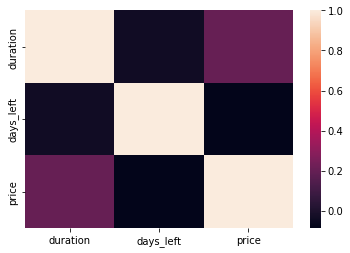

In [20]:
sns.heatmap(new.corr())

In [58]:
lr = LinearRegression()

In [91]:
lr.fit(X_train, y_train)

LinearRegression()

In [102]:
lr.score(X_test, y_test)

1.0

In [0]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

In [100]:
rf = RandomForestRegressor()

In [101]:
rf.fit(X_train, y_train)

RandomForestRegressor()

In [103]:
rf.score(X_train, y_train)

0.9999999200778553

In [39]:
from sklearn.linear_model import Ridge

In [43]:
rdg = Ridge()

In [46]:
n_samples, n_features = 10, 5
rng = np.random.RandomState(0)
y = rng.randn(n_samples)
X = rng.randn(n_samples, n_features)
clf = Ridge(alpha=1.0)
clf.fit(X, y)
Ridge()

Ridge()

In [56]:
print(Ridge.score(X_train, y_train))

TypeError: score() missing 1 required positional argument: 'y'

In [0]:
find = Ridge.predict(x_test)

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import numpy as np

In [36]:
new.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
225515,225515,Vistara,UK-996,Mumbai,Evening,zero,Night,Delhi,Business,2.17,7,44652
85200,85200,SpiceJet,SG-531,Bangalore,Morning,one,Evening,Delhi,Economy,9.42,8,7488
97816,97816,Vistara,UK-893,Bangalore,Evening,one,Afternoon,Mumbai,Economy,18.58,23,4792
231326,231326,Air_India,AI-867,Mumbai,Night,one,Evening,Bangalore,Business,18.75,17,54608
190282,190282,Indigo,6E-605,Chennai,Afternoon,one,Evening,Mumbai,Economy,5.50,23,4298


In [23]:
X = new["airline"].to_numpy()
y = new["price"].to_numpy()

In [92]:
y_hat = lr.predict(X_test)

In [0]:
print(lr.intercept_, lr.coef_[0])

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [24]:
poly = PolynomialFeatures()
X = cols
X

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price'],
      dtype='object')

In [124]:
#poly.fit_transform(X)

In [26]:
poly = PolynomialFeatures(interaction_only=True)
poly.fit_transform(X_train, y_train)

array([[ 1.  , 12.83, 47.  , ...,  0.  ,  0.  ,  0.  ],
       [ 1.  ,  2.17, 25.  , ...,  0.  ,  0.  ,  0.  ],
       [ 1.  ,  7.25, 43.  , ...,  0.  ,  1.  ,  0.  ],
       ...,
       [ 1.  , 28.08, 45.  , ...,  0.  ,  0.  ,  0.  ],
       [ 1.  , 10.83, 12.  , ...,  1.  ,  0.  ,  0.  ],
       [ 1.  , 10.83, 10.  , ...,  1.  ,  0.  ,  0.  ]])

In [32]:
demo = train[['price']].copy()
demo.head()

NameError: name 'train' is not defined

In [29]:
poly = PolynomialFeatures(degree=1, include_bias=False)
data = poly.fit_transform(train[["price"]])
data

NameError: name 'train' is not defined

In [37]:
#poly.get_feature_names_out()

In [38]:
#pd.new(data, columns=poly.get_feature_names_out())

In [44]:
prediction = rf.predict(X_test)

NameError: name 'rf' is not defined

In [43]:
plt.scatter(y_test,prediction, s=0.1, c='red')
plt.xlabel('Price', fontsize = 30)
plt.ylabel('Estimate', fontsize = 30)
plt.grid('on')
plt.plot([0,120000], [0,120000])
plt.show()

NameError: name 'prediction' is not defined